# Month sales report

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import sqlite3

db = sqlite3.connect('../db.sqlite3')

query = "SELECT * FROM Reservation_reservations WHERE strftime('%m', checkIn) = strftime('%m', 'now')"
df = pd.read_sql_query(query, db, parse_dates=['checkIn'])
df.sort_values(by='checkIn', inplace=True)

print(df.head())

              time        date  reservationID  downpayment  totalPayment  \
3         17:10:44  2023-02-18              4        12345         12345   
0         02:34:51  2023-01-03              1         1234        123456   
1         02:34:51  2023-01-03              2         1234        123456   
2  02:34:51.129253  2023-01-03              3        12345         12345   
4             None        None              5          123           123   

   balance    checkIn    checkOut  customer_id  discount_id  prices_id status  
3    12345 2023-02-06  2023-02-20            1            1          1    Yes  
0     1234 2023-02-09  2023-02-09            1            1          1    Yes  
1     1234 2023-02-09  2023-02-09            1            1          1    Yes  
2    12345 2023-02-09  2023-02-09            1            1          1    Yes  
4      123 2023-02-22  2023-02-22            1            1          6    Yes  


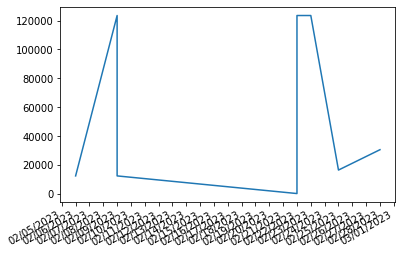

In [57]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(df["checkIn"], df["totalPayment"])
plt.gcf().autofmt_xdate()